In [1]:
import numpy as np
# Identity gate (I)
I = np.array([
    [1, 0],
    [0, 1]
])
# Pauli-X gate (X)
X = np.array([
    [0, 1],
    [1, 0]
])
# Hadamard gate (H)
H = (1 / np.sqrt(2)) * np.array([
    [1,  1],
    [1, -1]
])
# CNOT gate matrix
CX = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0]
])

In [2]:
# number of qubits = n
def apply_on_n_qubits(X_n, H_n, CX_n, n):
    # state of qubit
    state = np.zeros(2**n)
    state[0] = 1 # initial state = 000...
    # applying all gates on all qubits 
    state = X_n @ state
    state = H_n @ state
    state = CX_n @ state
    return state

In [3]:
X_n = X
H_n = H
CX_n = CX
print(CX_n.shape)

(4, 4)


In [4]:
import time
time_taken = []
state_n = []
N = 10

for n in range(2, N):
    X_n = np.kron(X_n, X)
    H_n = np.kron(H_n, H)
    if(n%2): # if odd n
        CX_n = np.kron(CX_n, I)
        print(n, "inside if")
    elif(n!=2): # if even n
        CX_n = np.kron(CX_n, CX)
        print(n, "inside elif")
    print(n,CX_n.shape)
    start = time.time()
    # state_n.append(apply_on_n_qubits(n))
    apply_on_n_qubits(X_n, H_n, CX_n, n)
    time_taken.append(time.time() - start)

# time_taken = np.array(time_taken)
n_values = [i for i in range(2,N)]
print(time_taken)

2 (4, 4)
3 inside if
3 (8, 8)
4 inside elif
4 (32, 32)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 16 is different from 32)

In [ ]:
# state_n

[array([ 0.5, -0.5,  0.5, -0.5]),
 array([ 0.35355339, -0.35355339, -0.35355339,  0.35355339,  0.35355339,
        -0.35355339, -0.35355339,  0.35355339]),
 array([ 0.25, -0.25,  0.25, -0.25, -0.25,  0.25, -0.25,  0.25,  0.25,
        -0.25,  0.25, -0.25, -0.25,  0.25, -0.25,  0.25]),
 array([ 0.1767767, -0.1767767, -0.1767767,  0.1767767,  0.1767767,
        -0.1767767, -0.1767767,  0.1767767, -0.1767767,  0.1767767,
         0.1767767, -0.1767767, -0.1767767,  0.1767767,  0.1767767,
        -0.1767767,  0.1767767, -0.1767767, -0.1767767,  0.1767767,
         0.1767767, -0.1767767, -0.1767767,  0.1767767, -0.1767767,
         0.1767767,  0.1767767, -0.1767767, -0.1767767,  0.1767767,
         0.1767767, -0.1767767]),
 array([ 0.125, -0.125,  0.125, -0.125, -0.125,  0.125, -0.125,  0.125,
         0.125, -0.125,  0.125, -0.125, -0.125,  0.125, -0.125,  0.125,
        -0.125,  0.125, -0.125,  0.125,  0.125, -0.125,  0.125, -0.125,
        -0.125,  0.125, -0.125,  0.125,  0.125, -0.125, 

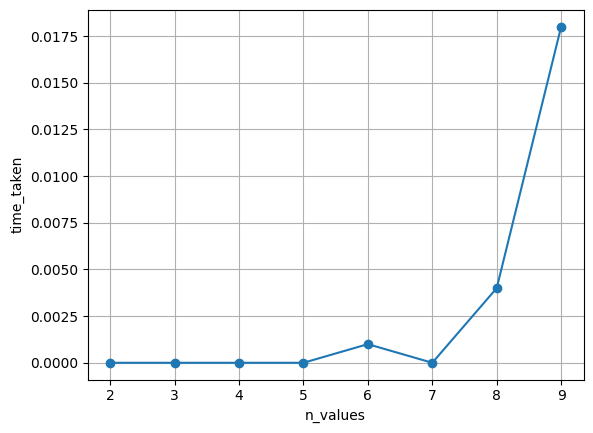

In [9]:
import matplotlib.pyplot as plt
plt.plot(n_values, time_taken, marker='o')
plt.xlabel("n_values")
plt.ylabel("time_taken")
plt.grid(True)
plt.show()